In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scrapping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    print(len(reviews))
    

Scrapping page 1
100
Scrapping page 2
200
Scrapping page 3
300
Scrapping page 4
400
Scrapping page 5
500
Scrapping page 6
600
Scrapping page 7
700
Scrapping page 8
800
Scrapping page 9
900
Scrapping page 10
1000
Scrapping page 11
1100
Scrapping page 12
1200
Scrapping page 13
1300
Scrapping page 14


In [ ]:
df = pd.DataFrame()
df['reviews'] = reviews
df

,reviews
0,✅ Trip Verified | Chaos at Terminal 5 with B...
1,Not Verified | BA cancelled our flight and co...
2,✅ Trip Verified | When on our way to Heathrow ...
3,"✅ Trip Verified | Nice flight, good crew, very..."
4,✅ Trip Verified | 8 months have passed and st...
...,...
3627,Flew return in CW from LHR to BKK in August 20...
3628,LHR to HAM. Purser addresses all club passenge...
3629,My son who had worked for British Airways urge...
3630,London City-New York JFK via Shannon on A318 b...


In [ ]:
df.to_csv("BA_Reviews.csv")

## Web Scrapping Part is Done

In [2]:
reviews = pd.read_csv("BA_Reviews.csv")
reviews = reviews.pop('reviews')
reviews

0       ✅ Trip Verified |   Chaos at Terminal 5 with B...
1       Not Verified |  BA cancelled our flight and co...
2       ✅ Trip Verified | When on our way to Heathrow ...
3       ✅ Trip Verified | Nice flight, good crew, very...
4       ✅ Trip Verified |  8 months have passed and st...
                              ...                        
3627    Flew return in CW from LHR to BKK in August 20...
3628    LHR to HAM. Purser addresses all club passenge...
3629    My son who had worked for British Airways urge...
3630    London City-New York JFK via Shannon on A318 b...
3631    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3632, dtype: object

## Cleaning text

In [3]:
def remove_punctuations(text):
    for punctuation in string.punctuation:  # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~   removes these character
        text = text.replace(punctuation, '')
    return text

In [4]:
def remove_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 3]  # Adjust the length condition as needed
    return ' '.join(filtered_words)

In [5]:
reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('✅', '')
# reviews = reviews.str.replace(r'\b\w{1,3}\b', '')
reviews = reviews.apply(remove_short_words)
reviews = reviews.apply(remove_punctuations)
reviews

0       Chaos Terminal with cancellations delays staff...
1       Verified cancelled flight could book onto flig...
2       When Heathrow Airport merely half hours before...
3       Nice flight good crew very good seat food what...
4       months have passed still wasting time with tea...
                              ...                        
3627    Flew return from August 2012 positives both fl...
3628    HAM Purser addresses club passengers name boar...
3629    worked British Airways urged British Airways K...
3630    London CityNew York Shannon A318 really nice s...
3631    SINLHR BA12 B747436 First Class aircraft 1998 ...
Name: reviews, Length: 3632, dtype: object

In [6]:
reviews.shape

(3632,)

In [7]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

flight        6449
with          5805
were          4407
that          4207
this          3541
they          3482
have          3308
from          3035
very          2794
service       2764
seat          2345
food          2317
london        2142
crew          2108
british       2105
airways       2088
seats         2075
good          2056
time          1996
cabin         1934
which         1870
class         1842
there         1703
when          1547
staff         1546
business      1535
heathrow      1504
would         1477
only          1447
their         1412
economy       1403
first         1255
after         1222
flights       1160
more          1146
been          1103
return        1094
just          1074
club          1073
other         1071
than          1060
back          1048
again         1022
hours         1020
plane         1020
lounge        1004
passengers     999
verified       991
airline        990
boarding       977
Name: count, dtype: int64

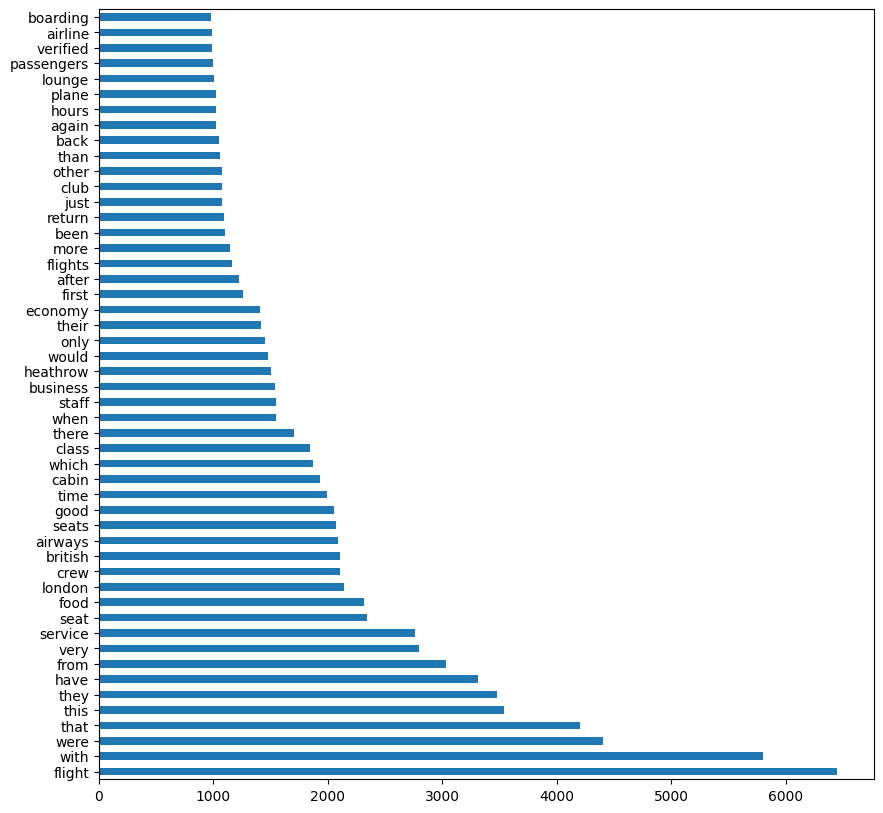

In [8]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0], y=freq_words[1])
plt.show()

## Text Clustering

In [25]:
cat = ['positive', 'negative']
num_cat = len(cat)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = tokenizer.tokenize)

In [27]:
review_counts = tf_idf_vect.fit_transform(reviews)

review_counts.shape

c:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3632, 14573)

In [28]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=num_cat).fit(review_counts)

pred_labels = Kmeans.labels_
pred_labels

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1])

In [29]:
cluster_centres = Kmeans.cluster_centers_
cluster_centres

array([[7.16031919e-05, 0.00000000e+00, 1.93388033e-04, ...,
        0.00000000e+00, 0.00000000e+00, 6.82611530e-05],
       [0.00000000e+00, 6.86001569e-05, 0.00000000e+00, ...,
        5.95460148e-05, 8.74782298e-05, 0.00000000e+00]])

In [30]:
unique, count = np.unique(pred_labels, return_counts=True)
dict(zip(unique, count))   # positive and negative features

{0: 1332, 1: 2300}

In [31]:
from sklearn import metrics

dbi = metrics.davies_bouldin_score(review_counts.toarray(), pred_labels)

ss = metrics.silhouette_score(review_counts.toarray(), pred_labels, metric='euclidean')

# Both of these gives clustering scores
# how similar an object is to its own cluster compared to other clusters. 

print("DBI Score: ", dbi)
print("Silhoutte score: ", ss)

DBI Score:  12.613321548314985
Silhoutte score:  0.006609773425142828


In [32]:
df_reviews = pd.DataFrame({'review': reviews, 'label': pred_labels})
df_reviews

,review,label
0,Chaos Terminal with cancellations delays staff...,0
1,Verified cancelled flight could book onto flig...,0
2,When Heathrow Airport merely half hours before...,0
3,Nice flight good crew very good seat food what...,1
4,months have passed still wasting time with tea...,0
...,...,...
3627,Flew return from August 2012 positives both fl...,1
3628,HAM Purser addresses club passengers name boar...,1
3629,worked British Airways urged British Airways K...,0
3630,London CityNew York Shannon A318 really nice s...,1


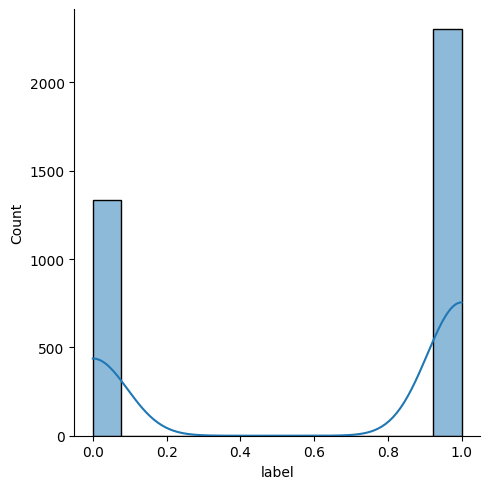

In [33]:
sns.displot(df_reviews['label'], kde=True)

In [34]:
positive_reviews = df_reviews[df_reviews['label'] == 1]
positive_reviews

,review,label
3,Nice flight good crew very good seat food what...,1
6,Ground cabin crew always provide good customer...,1
8,Easy check Galleries south North lounges packe...,1
11,Good domestic flight operated Cityflyer Ground...,1
16,most fantastic Flight today cabin crew seat zo...,1
...,...,...
3626,July 2012 flew overnight premium economy 767 c...,1
3627,Flew return from August 2012 positives both fl...,1
3628,HAM Purser addresses club passengers name boar...,1
3630,London CityNew York Shannon A318 really nice s...,1


In [35]:
negative_reviews = df_reviews[df_reviews['label'] == 0]
negative_reviews

,review,label
0,Chaos Terminal with cancellations delays staff...,0
1,Verified cancelled flight could book onto flig...,0
2,When Heathrow Airport merely half hours before...,0
4,months have passed still wasting time with tea...,0
5,June flight cancelled within three hours depar...,0
...,...,...
3610,normally whine here goes LHRCDG 0725 Tuesday m...,0
3617,Heathrow Marrakech previously travelled Britis...,0
3621,This Regional operated flight RJ145 from Manch...,0
3623,Just back from Bridgetown Barbados flying with...,0
